In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

Train shape: (6000, 28, 28, 1), Test shape: (1000, 28, 28, 1)


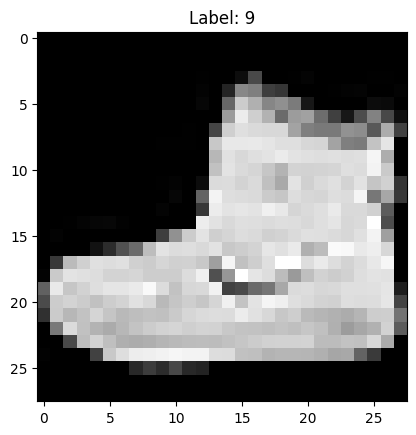

In [2]:
# Chargement des données Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0

# Expansion du canal pour être en (28,28,1)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# Prendre seulement 10% du dataset
train_images = train_images[:6000]
train_labels = train_labels[:6000]
test_images = test_images[:1000]
test_labels = test_labels[:1000]

print(f"Train shape: {train_images.shape}, Test shape: {test_images.shape}")

# Visualisation
plt.imshow(train_images[0].squeeze(), cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [3]:
IMG_SIZE = 224

def preprocess(image, label):
    image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).map(preprocess).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).map(preprocess).batch(batch_size)


In [4]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=4
)

Epoch 1/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 188s 999ms/step - accuracy: 0.8825 - loss: 0.3323 - val_accuracy: 0.8730 - val_loss: 0.3323
Epoch 2/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 172s 917ms/step - accuracy: 0.8940 - loss: 0.2910 - val_accuracy: 0.8830 - val_loss: 0.3227
Epoch 3/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9066 - loss: 0.2545 - val_accuracy: 0.8800 - val_loss: 0.3151
Epoch 4/4
188/188 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9210 - loss: 0.2145 - val_accuracy: 0.8880 - val_loss: 0.3142


In [8]:
loss, acc = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 554ms/step - accuracy: 0.8751 - loss: 0.3469
Test accuracy: 0.8880


In [12]:
import os

os.makedirs("model", exist_ok=True)
model.save("model/fashion_mnist_mobilenetv2.keras")
print("✅ Modèle sauvegardé avec succès.")

✅ Modèle sauvegardé avec succès.
